In [1]:
#Gerekli kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("sirket_giderleri.csv")

In [3]:
dataset.head()

,Arge,Yonetim,Pazarlama,Sehir,Kar
0,165349.20,136897.80,471784.10,Ankara,192261.83
1,162597.70,151377.59,443898.53,Istanbul,191792.06
2,153441.51,101145.55,407934.54,Bursa,191050.39
3,144372.41,118671.85,383199.62,Ankara,182901.99
4,142107.34,91391.77,366168.42,Bursa,166187.94


In [4]:
dataset.isnull().sum()

Arge         0
Yonetim      0
Pazarlama    0
Sehir        0
Kar          0
dtype: int64

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Kategorik veriler

<font color="gray">Kategorik verimiz 4. değişken olduğundan dolayı, bu sütun üzerinde işlem yapmak istiyoruz. Python'da indekleme 0'dan başladığı için bunu 3. sütun olarak işleme sokacağız. Değişkenimize baktığımızda 3 farklı şehir ismi yer alıyor. Bu her bir şehir için yeni bir sütun demek oluyor.Yani artık 4. sütun yerine, her şehir için yeni bir sütun oluşturuyoruz.Eğer veri setinde şehir Ankara  ise 1 yaz, diğer şehirlere ait hücrelere 0 yaz. Bunu yapmamızdaki asıl sebep şehirlerin birbirleri arasında üstünlüğünün olmamasını sağlamak. Çünkü 4. sütunda Ankara yerine 1, Bursa yerine 2, İstanbul yerine 3 yazmış olsaydık, İstanbulun diğer iki şehirden daha üstün olduğu anlamına gelecekti.</font>

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [7]:
print(pd.DataFrame(X).head())

     0    1    2          3          4          5
0  1.0  0.0  0.0  165349.20  136897.80  471784.10
1  0.0  0.0  1.0  162597.70  151377.59  443898.53
2  0.0  1.0  0.0  153441.51  101145.55  407934.54
3  1.0  0.0  0.0  144372.41  118671.85  383199.62
4  0.0  1.0  0.0  142107.34   91391.77  366168.42


<font color="gray">Yukarıdaki tabloda görüldüğü üzere 0,1 ve 2 numaralı değişkenlerimiz şehir değişkeni için oluşturduğumuz dummy features'u temsil ediyor.</font> <br>
<font color="green">Ankara -> 1. Sütun <br>
Bursa-> 2. Sütun <br>
İstanbul->3. Sütun</font>

In [8]:
#Farklı olan şehirlerin sayısı
dataset['Sehir'].value_counts()

Istanbul    17
Ankara      17
Bursa       16
Name: Sehir, dtype: int64

# Dummy Variable Tuzağından Kaçınma
Aşağıda örneğe baktığmızda merkezi A,B,C den oluşan ve kayıp değeri olan bir tablo görüyoruz.

Center  Loss<br>
  A -------     12.4<br>
  A -------     10.7<br>
  B -------     9.1<br>
  B -------     11.5<br>
  C -------     8.5<br>
  C -------     11.8<br>
  
  <font color="gray">Bu tablodaki kategorik değerlerin numerik ifadelere çevirdiğimizde şöyle bir taablo elde ederiz.</font>
  
  <font color="blue">dummy_a</font>  <font color="red">dummy_b</font>  <font color="magenta">dummy_c</font>   <font color="purple">Loss</font><br>
   1--------------------0-----------0---------12.4<br>
   1-------------------       0----------       1---------     10.7<br>
   0-------------------       1----------       0---------      9.1<br>
   0-------------------       1----------       0---------     11.5<br>
   0-------------------       0----------       1---------      8.5<br>
   0-------------------       0----------       1---------     11.8<br>
   
   
   and the matrix regression equation y = X β + ε would look like this:<br>
[ 12.4 ] &nbsp; &nbsp;   [ 1 1 0 0 ]           
[ 20.7 ] &nbsp; &nbsp;   [ 1 1 0 0 ] &nbsp; [ beta0  ]<br>
[  9.1 ] &nbsp; =  &nbsp;[ 1 0 1 0 ] &nbsp; [ alpha1 ] +  &nbsp;epsilon<br> 
[ 11.5 ] &nbsp; &nbsp;   [ 1 0 1 0 ]  &nbsp;[ alpha2 ] <br>
[  8.5 ] &nbsp; &nbsp; &nbsp;   [ 1 0 0 1 ]  &nbsp;[ alpha3 ]<br> 
[ 11.8 ]  &nbsp; &nbsp;  [ 1 0 0 1 ]<br>
  
  
- X matrisinin ilk sütununun ,kalan kalan üç sütunun toplamına eşit olduğuna dikkat edin, böylece 1. sütunun,  2., 3. ve 4. sütunlarıyla korelasyonu 1'dir.Böylece mükemmel korelasyon yakalarız ve X matrisini tersine çeviremeyiz. Bu nedenle de β ^ için denklemi çözemeyiz.

Bu yüzden oluşturduğumuz dummy değerlerinden herhangi birisini bırakmamız gerekiyor. Yani <font color="red">m</font> tane değerimiz varsa <font color="red">m - 1</font> değer için çözmemiz gerekiyor. Bu yüzden ben sayısı en az olan Bursa sütununu düşüreceğim. Herhangi bir satırda İstanbul ve Ankara değeri 0 olduğunda Bursa için bu değer 1 olarak iişlem yapılıyor. Böylece tuzağa düşmemiş oluyoruz.

In [9]:
# Dummy Variable Tuzağından Kaçınma
X = X[:, 1:]

In [10]:
# Training ve Test split olarak verimizi iki parçaya ayıralım
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Çoklu Modelimizi Eğitelim
'''Multiple Linear Regression Linear REgression sınıfından olduğu için LinearRegression class'ını yüklüyoruz ''' 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Test Sonuçlarını Tahmin Edelim
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([ 103015.20159797,  132582.27760815,  132447.73845175,
         71976.09851258,  178537.48221055,  116161.24230165,
         67851.69209675,   98791.73374687,  113969.43533013,
        167921.06569551])

# Features (Değişken) Seçimi

<font color="gray">Algoritmaları öğrenmeye başlarken en çok araştırdığım konu buydu sanırım. Bütun değişkenleri dahil ediyor muyuz? Ya da hangilerini seçmemiz gerekiyor. Bunun için birkaç yöntem mevcut bunlardan birisi de backward elemination.(Geriye doğru eleme)</font>
### Backward elemination
#### 1- P Değeri  Anlamlılık
- P değeri bir karşılaştırmada istatiksel anlamlılık düzeyine işaret eder. Olası hata miktarını gösterir. Bu değer 0,05 olarak önerilmiş ve kabul görmüştür. Bir test sonucunda bulunan P değeri 0,05'in altında ise karşılaştırma sonucunda anlamlı farklılık vardır.

#### 2 - Tüm değişkenler modele dahil edilir.

#### 3 -Her bir bağımsız değişkenin P dğerine bakılır. Bu değer 0.05'ten büyük ise değişken listeden çıkarılır. İlk olarak 0.05'ten büyük olan en büyük değer modelden çıkarılarak işleme başanır. Bütün değişkenlerin P değeri 0.05' in altında olana kadar işlem devam eder.

#### 4- Çıkarılan her bir değişkenden sonra model tekrar kurulur  ve 3. adım tekrar yapılır.
#### 5 - Eğer P değeri 0.05' in üstünde olan herhangi bir değişken yoksa, işlem sonlandırılır.



In [14]:
#Backward elemination işlemini gerçekleştirmek için gerekli kütüphanemizi dahil edelim
import statsmodels.formula.api as sm

### Multiple Linear Regression Formulu
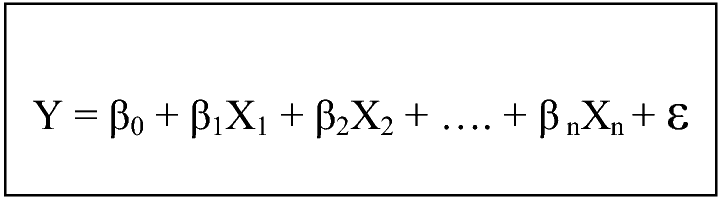

<font color="gray">Yukarıda formulde gördüğünüz gibi beta0 değeri sabit olup 1' e eşitir. Fakat bu değer bizim bağımsız değişkenlerimizin bulunduğu lisete (X) yok. Sabit 1 değerini bu listeye eklememiz gerekiyor.Bunun için Numpy' ın' append()  ve ones() methodunu kullanacağız. Normalde append fonksiyonuna 1.değer olarak listemizi 2. değer olarak ise eklemek istediğimiz değeri veririz.Fakat böyle yaptığımız beta0' ı listemizin en sonuna ekleriz.Fakat bu değişkeni ilk eleman olarak eklemek istiyoruz.Bunun için np.ones()'ı append() methoduna ilk eleman olarak, X' i ise 2. eleman olarak yazıyoruz. Böylece beta0 değerlerini başa almış oluyoruz.</font>

In [15]:
# X' bakarsanız 50 satırdan oluşuyor. Bu yüzden 50 satırlık 1 değerini np.ones(50,1) ile oluşturuyoruz.
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# summary() fonksiyonu ile istatiksek bir çok değere ulaşabiliriz.
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 14 Oct 2017   Prob (F-statistic):           1.34e-27
Time:                        15:08:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
x2            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.Adım P değeri en büyük ve 0.05'ten büyük olan listemizin 2. elemanı. Bu değeri listeden çıkaralım

In [16]:
X_opt = X[:, [0, 1,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 14 Oct 2017   Prob (F-statistic):           8.49e-29
Time:                        15:08:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.Adım P değeri en büyük ve 0.05'ten büyük olan listemizin 1. elemanı. Bu değeri de listeden çıkaralım

In [17]:
X_opt = X[:, [0,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 14 Oct 2017   Prob (F-statistic):           4.53e-30
Time:                        15:08:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.Adım P değeri en büyük ve 0.05'ten büyük olan listemizin 2. elemanı. Bu değeride listeden çıkaralım

In [18]:
X_opt = X[:, [0,3,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 14 Oct 2017   Prob (F-statistic):           2.16e-31
Time:                        15:08:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.Adım

In [19]:
X_opt = X[:, [0,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 14 Oct 2017   Prob (F-statistic):           4.38e-10
Time:                        15:08:16   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x1             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""